In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load data

In [ ]:
wine = datasets.load_wine()

In [ ]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
print(wine.DESCR,'\n')

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
data=pd.DataFrame(wine.data,columns=wine.feature_names)
target=wine.target

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Explore Data

In [ ]:
data.columns=wine.feature_names
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
data.shape

(178, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
data.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.0,0.8,11.0,12.4,13.0,13.7,14.8
malic_acid,178.0,2.3,1.1,0.7,1.6,1.9,3.1,5.8
ash,178.0,2.4,0.3,1.4,2.2,2.4,2.6,3.2
alcalinity_of_ash,178.0,19.5,3.3,10.6,17.2,19.5,21.5,30.0
magnesium,178.0,99.7,14.3,70.0,88.0,98.0,107.0,162.0
total_phenols,178.0,2.3,0.6,1.0,1.7,2.4,2.8,3.9
flavanoids,178.0,2.0,1.0,0.3,1.2,2.1,2.9,5.1
nonflavanoid_phenols,178.0,0.4,0.1,0.1,0.3,0.3,0.4,0.7
proanthocyanins,178.0,1.6,0.6,0.4,1.2,1.6,2.0,3.6
color_intensity,178.0,5.1,2.3,1.3,3.2,4.7,6.2,13.0


array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

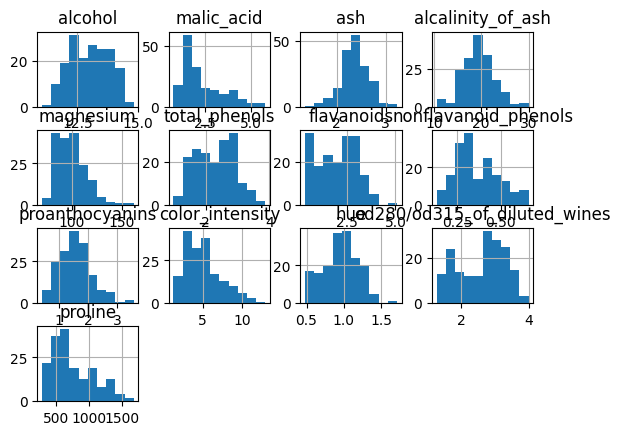

In [ ]:
data.hist()

In [ ]:
type(target)

numpy.ndarray

In [ ]:
np.unique(target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

#### Preprocess data

##### 01 - If you do not search the best k, then do not split the data

In [ ]:
data1=data.copy()

In [ ]:
# Skewed distribution (X) -->log(X) or sqrt(X) or power transform--> Normal distribution
# Feature scaling: scale of features to be in the same range (Minmaxscaler <Normalization> or Standardscaler <Standardlization>)
# A row of input [x1,x2,---,xn] to be a norm --> normalizer
normalizer=MinMaxScaler().fit(data1)
data1=pd.DataFrame(normalizer.transform(data1), columns=wine.feature_names)

In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,0.518584,0.213639,0.0,0.350658,0.531579,0.696711,1.0
malic_acid,178.0,0.315484,0.220780,0.0,0.170455,0.222332,0.462945,1.0
ash,178.0,0.538244,0.146708,0.0,0.454545,0.534759,0.640374,1.0
alcalinity_of_ash,178.0,0.458502,0.172142,0.0,0.340206,0.458763,0.561856,1.0
magnesium,178.0,0.323278,0.155244,0.0,0.195652,0.304348,0.402174,1.0
total_phenols,178.0,0.453487,0.215811,0.0,0.262931,0.474138,0.627586,1.0
flavanoids,178.0,0.356386,0.210730,0.0,0.182489,0.378692,0.534810,1.0
nonflavanoid_phenols,178.0,0.437460,0.234818,0.0,0.264151,0.396226,0.580189,1.0
proanthocyanins,178.0,0.372523,0.180555,0.0,0.264984,0.361199,0.485804,1.0
color_intensity,178.0,0.322363,0.197806,0.0,0.165529,0.290956,0.419795,1.0


##### 02 - If you search the best k, then split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3,shuffle=True,stratify=target,random_state=100)

In [ ]:
X_train.shape

(124, 13)

In [ ]:
X_test.shape

(54, 13)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([41, 50, 33]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([18, 21, 15]))

In [ ]:
y_test[:5]

array([2, 0, 1, 2, 1])

In [ ]:
normalizer1=MinMaxScaler().fit(X_train)
X_train=normalizer1.transform(X_train)
X_train

array([[0.54301075, 0.19565217, 0.22222222, ..., 0.5203252 , 0.6007326 ,
        0.62196862],
       [0.75268817, 0.16403162, 0.60130719, ..., 0.52845528, 0.47619048,
        0.60770328],
       [0.58333333, 0.2055336 , 0.2875817 , ..., 0.46341463, 0.78021978,
        0.55064194],
       ...,
       [0.55913978, 0.22924901, 0.68627451, ..., 0.10569106, 0.02197802,
        0.10485021],
       [0.33870968, 0.41304348, 0.33986928, ..., 0.54471545, 0.74358974,
        0.0085592 ],
       [0.83064516, 0.14624506, 0.40522876, ..., 0.56097561, 0.56776557,
        0.7146933 ]])

In [ ]:
X_train=pd.DataFrame(X_train,columns=wine.feature_names)
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.543011,0.195652,0.222222,0.069364,0.166667,0.582734,0.607375,0.057692,0.788644,0.595506,0.520325,0.600733,0.621969
1,0.752688,0.164032,0.601307,0.508671,0.440476,0.665468,0.635575,0.500000,0.413249,0.528090,0.528455,0.476190,0.607703
2,0.583333,0.205534,0.287582,0.000000,0.261905,0.557554,0.496746,0.230769,0.274448,0.278652,0.463415,0.780220,0.550642
3,0.360215,0.077075,0.300654,0.450867,0.107143,0.863309,0.570499,0.096154,0.460568,0.286517,0.601626,0.586081,0.101284
4,0.725806,0.715415,0.366013,0.653179,0.119048,0.064748,0.000000,0.730769,0.233438,0.530337,0.243902,0.175824,0.172611


In [ ]:
X_test=normalizer1.transform(X_test)
X_test=pd.DataFrame(X_test,columns=wine.feature_names)

#### Model

##### 01 - If you do not search the best k, then use knn to fit and predict the whole dataset

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(data1,target)

#Predict the response for test dataset
target_pred = knn.predict(data1)

Classification Report: 
               precision    recall  f1-score   support

     class_0       0.97      1.00      0.98        59
     class_1       1.00      0.94      0.97        71
     class_2       0.96      1.00      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178
 

Accuracy:  0.9775280898876404 



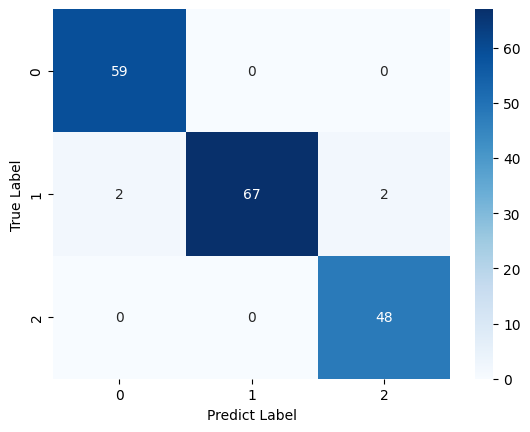

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Classification Report: \n", metrics.classification_report(target,target_pred,target_names=wine.target_names),'\n')
print("Accuracy: ",metrics.accuracy_score(target,target_pred),'\n')
cf=metrics.confusion_matrix(target,target_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

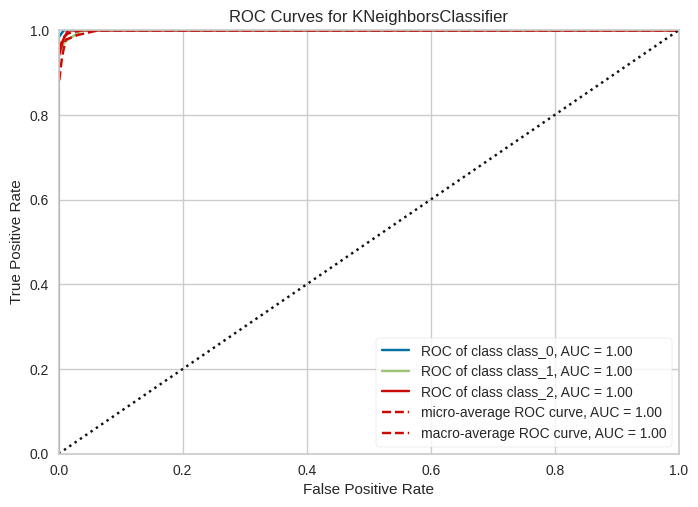

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(knn, classes=wine.target_names)
visualizer.fit(data1, target)        # Fit the training data to the visualizer
visualizer.score(data1,target)        # Evaluate the model on the test data
visualizer.show()

##### 02 - If you search the best k, then use knn to fit the train set and test set. Later, you can try knn with different number of k, then based on the evaluation metrics to select the best k.

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

Classification Report: 
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54
 

Accuracy on train:   0.967741935483871 

Accuracy on test:  0.9814814814814815 



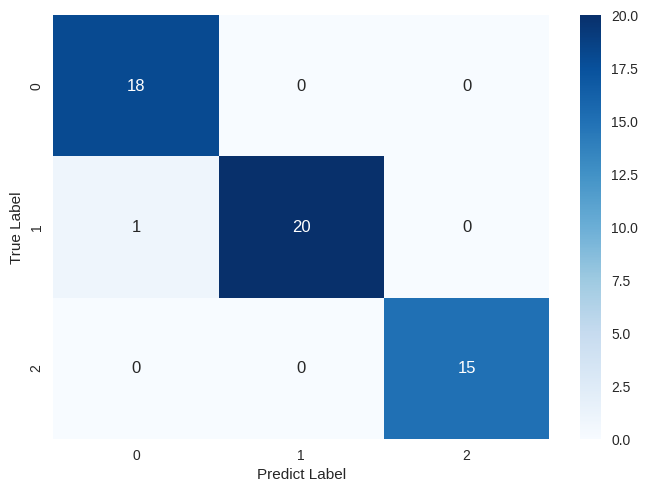

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Classification Report: \n", metrics.classification_report(y_test,y_pred,target_names=wine.target_names),'\n')
print("Accuracy on train:  ",knn.score(X_train,y_train),'\n')
print("Accuracy on test: ",knn.score(X_test,y_test),'\n')
cf=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [ ]:
#let find ROC and AUC score
#before we calculate roc_auc_score(), we need to find out the predicted probabilities for test data.
pred_prob = pd.DataFrame(knn.predict_proba(X_test))
#we'll also add the actual label
test_result=pd.DataFrame(y_test)
test_result.columns=['actual']
test_result = test_result.reset_index()
test_result['prob_0'] = pred_prob.iloc[:,0]
test_result['prob_1'] = pred_prob.iloc[:,1]
test_result['prob_2'] = pred_prob.iloc[:,2]
test_result.head()

,index,actual,prob_0,prob_1,prob_2
0,0,2,0.0,0.0,1.0
1,1,0,1.0,0.0,0.0
2,2,1,0.0,1.0,0.0
3,3,2,0.0,0.0,1.0
4,4,1,1.0,0.0,0.0


In [ ]:
y_train.reshape(-1,1)

array([[0],
       [0],
       [0],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [2],
       [1],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [2],
       [2],
       [0],
       [0],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [2],
       [0],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [2],
       [0],
       [0],
       [1],
       [1],
    

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(handle_unknown='ignore')
enc.fit(y_train.reshape(-1,1))
y_test1=pd.DataFrame(enc.transform(y_test.reshape(-1,1)).toarray())
y_test1.head()

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


In [ ]:
#accuracy for each class
metrics.roc_auc_score(y_test1,test_result[['prob_0','prob_1','prob_2']],average=None)

array([0.9845679 , 0.97113997, 1.        ])

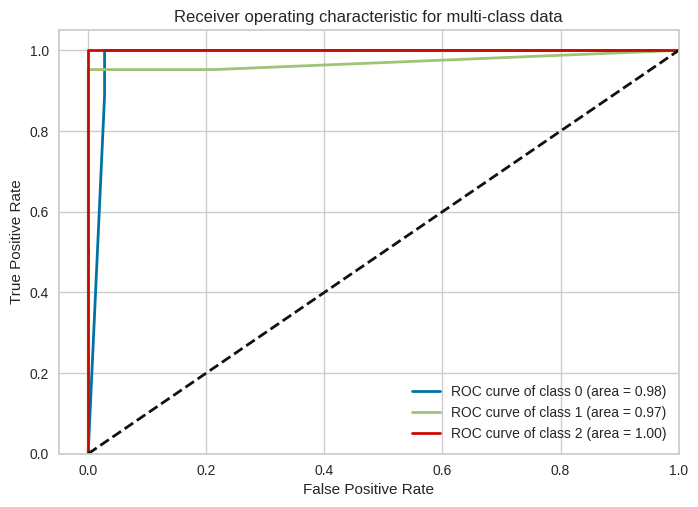

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
k=y_test1.shape[1]
for i in range(k):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test1[[i]], pred_prob[[i]])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

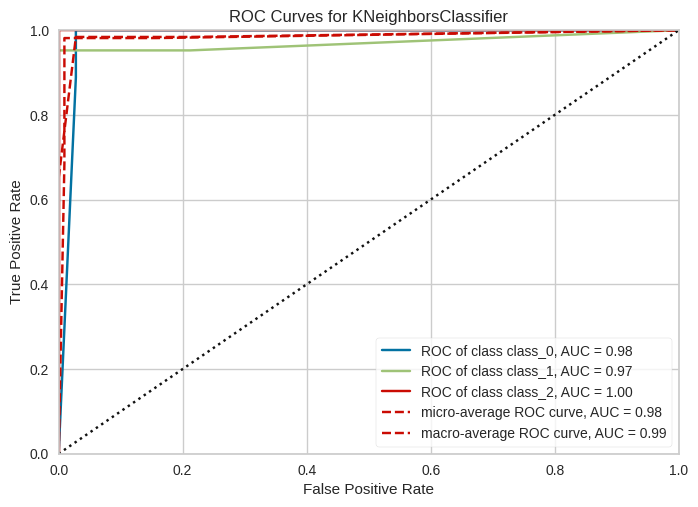

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Fast way to draw ROC curve and calculate AUC accuarcies of each class
#from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(knn, classes=wine.target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

##### 03 - If you search the best k, you can do directly search the best k based on trainset by using cv (cross validation)

In [ ]:
#hyperparameter tuning using grid search
from sklearn.model_selection import GridSearchCV
#we'll create a dictionary with possible hyperparameter values
param_val = [{'n_neighbors' : range(3,10),'metric' : ['euclidean', 'minkowski', 'canberra']}]
#grid search configuration
clfr = GridSearchCV(KNeighborsClassifier(), param_val, cv = 5,scoring='roc_auc_ovr')
#fitting into our data
clfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'minkowski', 'canberra'],
                          'n_neighbors': range(3, 10)}],
             scoring='roc_auc_ovr')

In [ ]:
#we'll see for best score and parameters
print(clfr.best_score_)
print(clfr.best_params_)

0.9993104575163398
{'metric': 'canberra', 'n_neighbors': 8}


In [ ]:
y_pred_new = clfr.predict(X_test)

In [ ]:
pred_prob_new=pd.DataFrame(clfr.predict_proba(X_test))
metrics.accuracy_score(y_test,y_pred_new)

0.9444444444444444

In [ ]:
#set knn with the best parameters, you will get the same result as the clfr.
#clfr will use the best parameters it found to predict the new dataset.
knn1 = KNeighborsClassifier(n_neighbors=8,metric='canberra')
knn1.fit(X_train,y_train)
y_pred_new1=knn1.predict(X_train)
pred_prob_new1=pd.DataFrame(knn1.predict_proba(X_test))
metrics.accuracy_score(y_train,y_pred_new1)

0.9435483870967742